In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

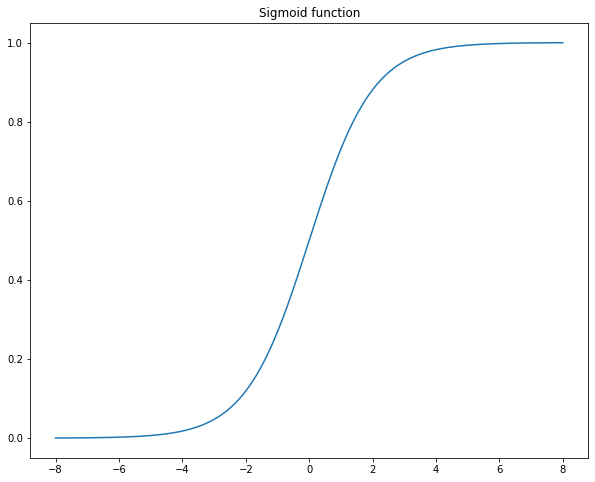

In [5]:
# plotting sigmoid function
x = np.linspace(-8, 8, num= 1000)
plt.figure(figsize= (10,8))
plt.plot(x,1/ (1 + np.exp(-x)));    # sigmoid
plt.title("Sigmoid function");

In [18]:
# cut-off point / threshold
a = [0, 0.4, 1, 0.6, 0.3, 0.8, 0.9, 0.1]
print(a)

[0, 0.4, 1, 0.6, 0.3, 0.8, 0.9, 0.1]


In [8]:
print("Values greater than 0.5 as 1 and less than 0.5 as 0: \n", np.round(a))

Values greater than 0.5 as 1 and less than 0.5 as 0: 
 [0. 0. 1. 1. 0. 1. 1. 0.]


In [9]:
# defining cut-off point by own
np.array(a) > 0.7

array([False, False,  True, False, False,  True,  True, False])

In [11]:
for i in range(len(a)):
    if a[i] > 0.4:
        a[i] = 1
    else:
        a[i] = 0

In [12]:
a

[0, 0, 1, 1, 0, 1, 1, 0]

In [13]:
# function to implement simple logistic regression

def log_reg(arr, threshold):
    for i in range(len(arr)):
        if(arr[i] > threshold):
            arr[i] = 1
        else:
            arr[i] = 0
            
    return arr

In [20]:
# cut-off point / threshold
a = [0, 0.4, 1, 0.6, 0.3, 0.8, 0.9, 0.1]
print(a)
c = log_reg(a, 0.6)
print("after applying threshold: ", c)

[0, 0.4, 1, 0.6, 0.3, 0.8, 0.9, 0.1]
after applying threshold:  [0, 0, 1, 0, 0, 1, 1, 0]


# Making prediction using Logistic Regression

$$\hat{y} = \frac{1.0}{1.0 + e^{-\beta_0-\beta_1x_1}} $$
$\beta_0$ is the intercept term.<br>
$\beta_1$ is the coefficient for $x_1$.<br><br>
$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to the class segregation point. 

In [21]:
# making some dummy dataset

dataset= [[-2.0011, 0],
          [-1.4654, 0],
          [0.0965, 0],
          [1.3881, 0],
          [3.0641, 0],
          [7.6275, 1],
          [5.3324, 1],
          [6.9225, 1],
          [8.6754, 1],
          [7.6737, 1]]

In [22]:
print(dataset)

[[-2.0011, 0], [-1.4654, 0], [0.0965, 0], [1.3881, 0], [3.0641, 0], [7.6275, 1], [5.3324, 1], [6.9225, 1], [8.6754, 1], [7.6737, 1]]


In [27]:
d = dataset[0]

In [29]:
d[0]

-2.0011

In [37]:
c

[[-2.0011, 0]]

In [38]:
v = np.array(dataset)

In [50]:
# slicing 
v[:,0]

array([-2.0011, -1.4654,  0.0965,  1.3881,  3.0641,  7.6275,  5.3324,
        6.9225,  8.6754,  7.6737])

In [52]:
# defining coeficient 
coef = [-0.806605464, 0.2573316]

In [59]:
# getting prediction by applying above formula for logistic regression

for row in dataset:
    y_hat = 1.0/ (1.0 + np.exp(-coef[0]- coef[1]* row[0]))
    print("predicted value: {0:.4f}, y_hat: {1}, original value: {2}".format(y_hat, round(y_hat), row[1]))

predicted value: 0.2106, y_hat: 0.0, original value: 0
predicted value: 0.2344, y_hat: 0.0, original value: 0
predicted value: 0.3139, y_hat: 0.0, original value: 0
predicted value: 0.3895, y_hat: 0.0, original value: 0
predicted value: 0.4955, y_hat: 0.0, original value: 0
predicted value: 0.7606, y_hat: 1.0, original value: 1
predicted value: 0.6377, y_hat: 1.0, original value: 1
predicted value: 0.7261, y_hat: 1.0, original value: 1
predicted value: 0.8063, y_hat: 1.0, original value: 1
predicted value: 0.7628, y_hat: 1.0, original value: 1


# Using Scikit learn to estimate coefficients

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [69]:
# splitting dataset for fearture and class
X = np.array(dataset)[:,0:1]
y = np.array(dataset)[:,1]

In [70]:
print(X)

[[-2.0011]
 [-1.4654]
 [ 0.0965]
 [ 1.3881]
 [ 3.0641]
 [ 7.6275]
 [ 5.3324]
 [ 6.9225]
 [ 8.6754]
 [ 7.6737]]


In [71]:
print(y)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [74]:
# instantiate logistic regression
clf_LR = LogisticRegression(C= 1.0, penalty= 'l2', tol= 0.01)

In [75]:
# fit the model
clf_LR.fit(X,y)

LogisticRegression(tol=0.01)

In [77]:
# predict
clf_LR.predict(X)

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [78]:
# getting probability distribution
clf_LR.predict_proba(X)

array([[0.9985344 , 0.0014656 ],
       [0.9974073 , 0.0025927 ],
       [0.98642688, 0.01357312],
       [0.94823709, 0.05176291],
       [0.75393859, 0.24606141],
       [0.02299601, 0.97700399],
       [0.21409383, 0.78590617],
       [0.0475628 , 0.9524372 ],
       [0.00763595, 0.99236405],
       [0.02191419, 0.97808581]])

# Classification Exercise

In [98]:
dataset_2 = [[0.2, 0.],
             [0.2, 0.],
             [0.2, 0.],
             [0.2, 0.],
             [0.2, 0.],
             [0.4, 0.],
             [0.3, 0.],
             [0.2, 0.],
             [0.2, 0.],
             [0.1, 0.],
             [1.4, 1.],
             [1.5, 1.],
             [1.5, 1.],
             [1.3, 1.],
             [1.5, 1.],
             [1.3, 1.],
             [1.6, 1.],
             [1., 1.],
             [1.3, 1.],
             [1.4, 1.]]

In [99]:
# splitting dataset 
X_1 = np.array(dataset_2)[:,0:1]
y_1 = np.array(dataset_2)[:,1]

In [100]:
print(X_1)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]]


In [101]:
print(y_1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [102]:
print("Number of samples in second dummy dataset: ", len(X_1))

Number of samples in second dummy dataset:  20


In [108]:
# importing logistic regression from scikit learn 
from sklearn.linear_model import LogisticRegression

In [115]:
# instantiate model
LR_2 = LogisticRegression(C= 1.0, penalty= 'l2', tol= 0.001)

In [116]:
# fit the model 
LR_2.fit(X_1, y_1)

LogisticRegression(tol=0.001)

In [119]:
# predict the model 
y_pred = LR_2.predict(X_1)

In [120]:
# getting probbility distribution 
LR_2.predict_proba(X_1)

array([[0.79820323, 0.20179677],
       [0.79820323, 0.20179677],
       [0.79820323, 0.20179677],
       [0.79820323, 0.20179677],
       [0.79820323, 0.20179677],
       [0.71335635, 0.28664365],
       [0.75830731, 0.24169269],
       [0.79820323, 0.20179677],
       [0.79820323, 0.20179677],
       [0.83296421, 0.16703579],
       [0.19701391, 0.80298609],
       [0.16290866, 0.83709134],
       [0.16290866, 0.83709134],
       [0.2362441 , 0.7637559 ],
       [0.16290866, 0.83709134],
       [0.2362441 , 0.7637559 ],
       [0.13372419, 0.86627581],
       [0.38264387, 0.61735613],
       [0.2362441 , 0.7637559 ],
       [0.19701391, 0.80298609]])

In [122]:
# comparision of prediction and truth value
np.column_stack((y_1, y_pred))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])